**Statistics 1 project**


We have analyzed the movie ratings among different platforms however, we focused on finding out the potential biasness in Fandango's ratings, as inspired by the famous data journilist Walt Hinckey(https://fivethirtyeight.com/features/fandango-movies-ratings/), who analyzed the datasets of fandango and found out discrepancies as discussed in the article. Moreover, we compared the fandango's ratings with other popular platforms like Rotten Tomatoes and IMDb.

By exploring and analysing distribution, biasness, realtionships among ratings, we aim to understand the implications of fandango's discrepancies.

Main objectives:
1. Identify the biasness in fandango ratings
2. Comparing the ratings with other platforms.
3. Exploring correlations and distributions to gain meaningful insights.

Project is presented by : Sakshi Asati, Sangram More and Sukriti Sehgal.

In [ ]:
#imported required liberies
import pandas as pd #for data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #for numerical computations

In [ ]:
#loading our datasets
previous = pd.read_csv('/content/fandango_score_comparison.csv')
after = pd.read_csv('/content/movie_ratings_16_17.csv')

In [ ]:
#picking out the nessesary columns
previous_fandango = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after_fandango = after[['movie', 'fandango', 'year']]

In [ ]:
previous_fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [ ]:
after_fandango.head()

,movie,fandango,year
0,10 Cloverfield Lane,3.5,2016
1,13 Hours,4.5,2016
2,A Cure for Wellness,3.0,2016
3,A Dog's Purpose,4.5,2017
4,A Hologram for the King,3.0,2016


In [ ]:
previous_fandango.info()#summary of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
previous_fandango.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [ ]:
after_fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   fandango  214 non-null    float64
 2   year      214 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [ ]:
after_fandango.describe()

,fandango,year
count,214.000000,214.000000
mean,3.894860,2016.107477
std,0.516781,0.310444
min,2.500000,2016.000000
25%,3.500000,2016.000000
50%,4.000000,2016.000000
75%,4.500000,2016.000000
max,5.000000,2017.000000


Text(0.5, 1.0, 'Fandango rating over 2015')

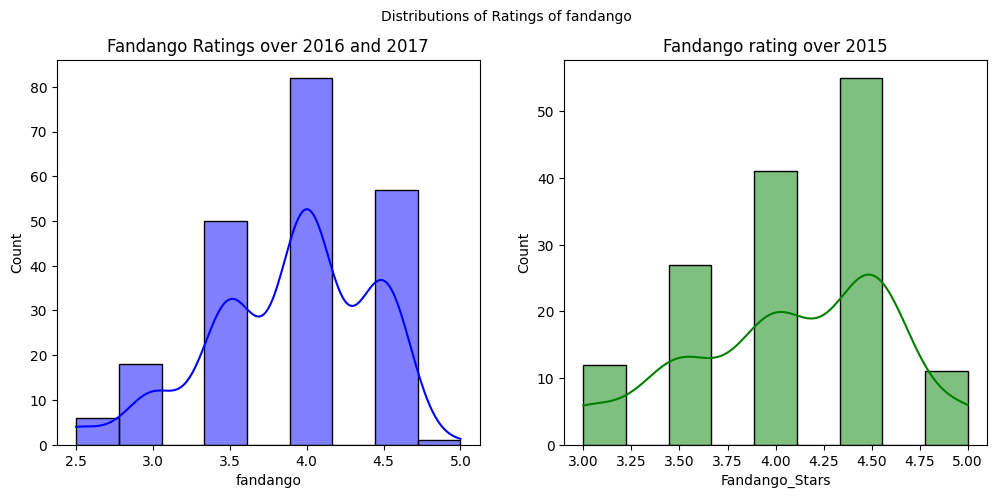

In [ ]:
#the distribution of fandango rating over the years
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distributions of Ratings of fandango', fontsize=10)

sns.histplot(after_fandango['fandango'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Fandango Ratings over 2016 and 2017')

sns.histplot(previous_fandango['Fandango_Stars'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Fandango rating over 2015')


We can clearly observe the skew towards higher ratings in the 2015 data but less skewness in data from 2016-2017, however they are still leaning towards 4.0-4.5.

To get a clear picture of the biasness and discrepency we will analysis the data of 2015 and 2016.  

In [ ]:
previous_fandango['year'] = previous_fandango['FILM'].str[-5:-1] #extracting year from the data

<ipython-input-16-09c1401d4d3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_fandango['year'] = previous_fandango['FILM'].str[-5:-1] #extracting year from the data


In [ ]:
previous_fandango['year'].value_counts()# frequency distribution of the 'year' column to interepret the number of columns

,count
year,
2015,129
2014,17


In [ ]:
# Isolate movies released in 2015
fandango_2015 = previous_fandango[previous_fandango['year'] == '2015']
print(fandango_2015['year'].value_counts())

year
2015    129
Name: count, dtype: int64


In [ ]:
# Isolate movies released in 2016
fandango_2016 = after_fandango[after_fandango['year'] == 2016]
print(fandango_2016['year'].value_counts())

year
2016    191
Name: count, dtype: int64


<ipython-input-20-ff3731ad6678>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fandango_2015['Fandango_Stars'], label='2015', shade=True)
<ipython-input-20-ff3731ad6678>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fandango_2016['fandango'], label='2016', shade=True, color='blue')


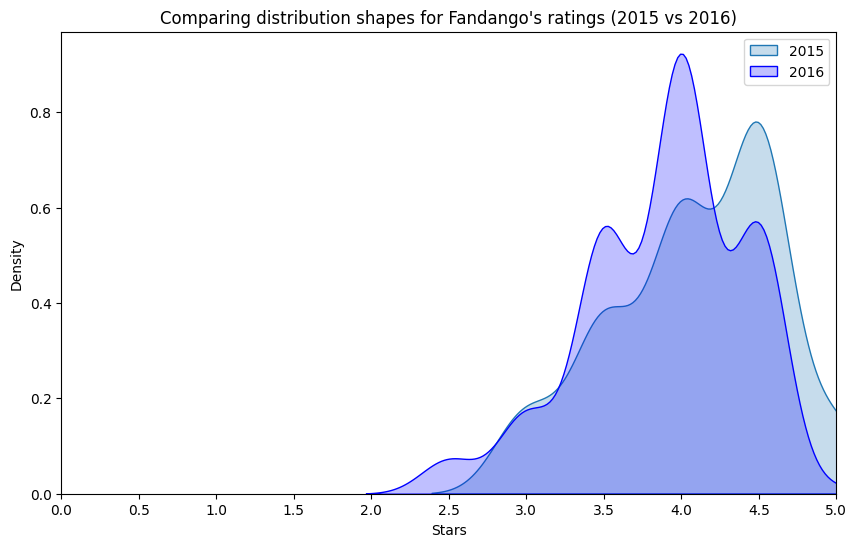

In [ ]:
# Kernel density plot comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(fandango_2015['Fandango_Stars'], label='2015', shade=True)
sns.kdeplot(fandango_2016['fandango'], label='2016', shade=True, color='blue')
plt.title("Comparing distribution shapes for Fandango's ratings (2015 vs 2016)")
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.legend()
plt.show()

We can clearly observe the skewness of 2015 data towards the higher ratings however, the data is more distributed in case of 2016.  The reduced skewness shows the changes made after walt analysis to make ratings more accurate.

In [ ]:
# Frequency distribution of ratings
fandango_2015_freq = fandango_2015['Fandango_Stars'].value_counts(normalize=True) * 100
fandango_2016_freq = fandango_2016['fandango'].value_counts(normalize=True) * 100
print(f"2015 Ratings Distribution:\n{fandango_2015_freq}")
print(f"2016 Ratings Distribution:\n{fandango_2016_freq}")

2015 Ratings Distribution:
Fandango_Stars
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: proportion, dtype: float64
2016 Ratings Distribution:
fandango
4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: proportion, dtype: float64


The frequency distribution shows us the skewness towards high scores in 2015 ratings, where as a balanced distribution in 2016 ratings.

In [ ]:
# Summary statistics
def mode(series):
    return series.mode()[0]

summary_2015 = pd.DataFrame({
    'year': ['2015'],
    'mean': [fandango_2015['Fandango_Stars'].mean()],
    'median': [fandango_2015['Fandango_Stars'].median()],
    'mode': [mode(fandango_2015['Fandango_Stars'])]
})

summary_2016 = pd.DataFrame({
    'year': ['2016'],
    'mean': [fandango_2016['fandango'].mean()],
    'median': [fandango_2016['fandango'].median()],
    'mode': [mode(fandango_2016['fandango'])]
})

summary_df = pd.concat([summary_2015, summary_2016])
summary_df_melted = pd.melt(summary_df, id_vars='year', var_name='statistic', value_name='value')
print(summary_df_melted)

   year statistic     value
0  2015      mean  4.085271
1  2016      mean  3.887435
2  2015    median  4.000000
3  2016    median  4.000000
4  2015      mode  4.500000
5  2016      mode  4.000000


We can see that mean of 2015 is higher than mean of 2016 which shows that the after 2015 fandango rating started becoming distributed and lower which better reflects the actual ratings.
For the users it shows a realistic approch whereas for fandango it shows correction to its biasness.

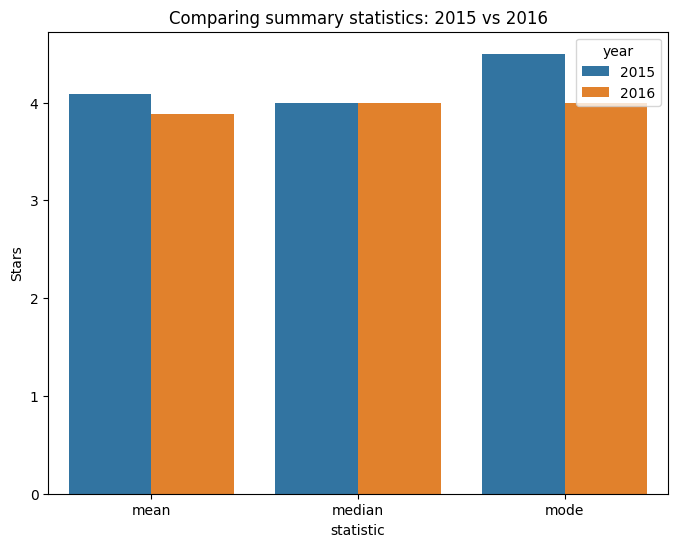

In [ ]:
# Bar plot comparison of summary statistics
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_df_melted, x='statistic', y='value', hue='year')
plt.title("Comparing summary statistics: 2015 vs 2016")
plt.ylabel('Stars')
plt.show()

In [ ]:
# Calculate the percentage change in the mean rating
mean_2015 = summary_df.loc[summary_df['year'] == '2015', 'mean'].values[0]
mean_2016 = summary_df.loc[summary_df['year'] == '2016', 'mean'].values[0]
percentage_change = (mean_2015 - mean_2016) / mean_2015 * 100
print(f"Percentage change in mean rating: {percentage_change:.2f}%")

Percentage change in mean rating: 4.84%


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# t-test
t_stat, p_value = ttest_ind(fandango_2015['Fandango_Stars'], fandango_2016['fandango'])
print(f"T-test p-value: {p_value}")

# Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(fandango_2015['Fandango_Stars'], fandango_2016['fandango'])
print(f"Mann-Whitney U Test p-value: {p_value}")


T-test p-value: 0.0009686073376113552
Mann-Whitney U Test p-value: 0.001032445879587162


Conclusion based on the tests:
Both p-values lie below the stardard significance threshold which is 0.05, suggesting the significant difference between the ratings in 2016 and 2015.
However, we are rejecting null hypothesis, which assumes no difference between 2015 and 2016.
This supports the claim that ratings were slightly changed from 2015 to 2016 to regain the trust of users.

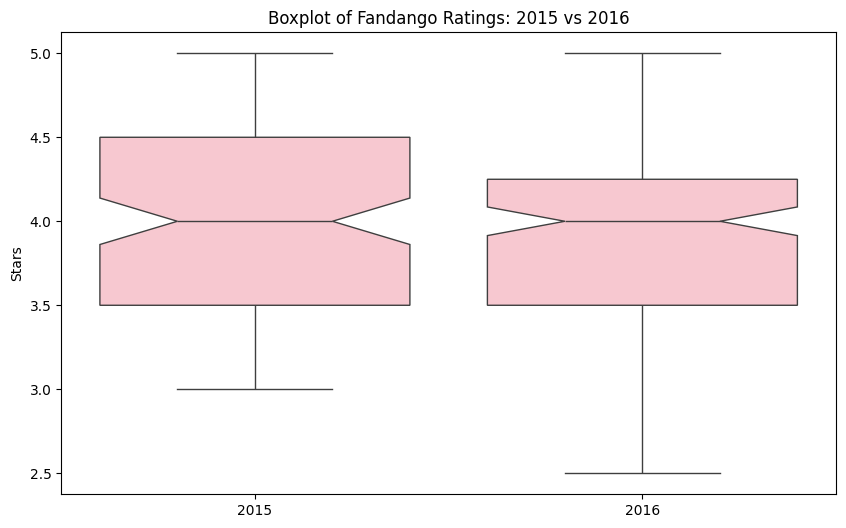

In [ ]:
#boxplot of fandango ratings 2015 vs 2016

plt.figure(figsize=(10, 6))
sns.boxplot(data=[fandango_2015['Fandango_Stars'], fandango_2016['fandango']],
            color="pink",
            notch=True)
plt.xticks([0, 1], ['2015', '2016'])
plt.title("Boxplot of Fandango Ratings: 2015 vs 2016")
plt.ylabel("Stars")
plt.show()


Observations from the boxplot:
1. Higher rating in 2015 ranging from 3.5 to 4.5. Whereas in 2016, ratings are ranging from 3.5 to 4.0 which is low when compared.
2. Range between the lowest and highest rating extendends from 3.0 to 5.0 and for 2016 from 2.5 to 5.0 showing the wider spread.

The boxplot aligns with our anlysis that they have lowered the ratings from 2015 to 2016, suggesting the movement towards more realistic evaluations.


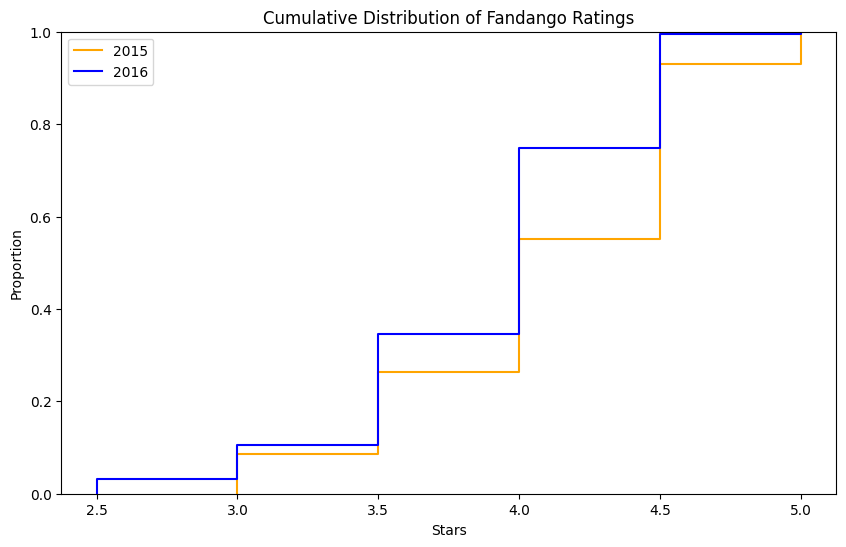

In [ ]:
#Cumulative Distribution Function (CDF)
plt.figure(figsize=(10, 6))
sns.ecdfplot(fandango_2015['Fandango_Stars'], label='2015', color='orange')
sns.ecdfplot(fandango_2016['fandango'], label='2016', color='blue')
plt.title("Cumulative Distribution of Fandango Ratings")
plt.xlabel("Stars")
plt.ylabel("Proportion")
plt.legend()
plt.show()


Observations:
1. As we can see the distribution for 2016 starts from 2.5 and rises faster than 2015 indicating there are movies in 2016 with ratings below 4.0 stars.
2. The blue line which is 2016 reaches 1.0 faster suggesting few movies are there in 2016 with 5.0 stars.
3. The curve of organge line shows that higher proportion of movies have ratings closer to 5.0 stars.

All in all, the CDF shows a downward curve from 2015 to 2016.

In [ ]:
after_fandango = after_fandango.rename(columns={'movie': 'FILM'}) #changing the name of column from movie to film to make the name of column same as previous dataset

In [ ]:
fandango_2016 = after_fandango[after_fandango['year'] == 2016]
fandango_2016

,FILM,fandango,year
0,10 Cloverfield Lane,3.5,2016
1,13 Hours,4.5,2016
2,A Cure for Wellness,3.0,2016
4,A Hologram for the King,3.0,2016
5,A Monster Calls,4.0,2016
...,...,...,...
207,Whiskey Tango Foxtrot,3.5,2016
208,Why Him?,4.0,2016
209,X-Men: Apocalypse,4.0,2016
212,Zoolander 2,2.5,2016


**Finding the biasness**


To detect the biasness we will compare the ratings with other platforms (Rotten Tomatoes, Metacritic, IMDb)


Making a dataset for other ratings that is imbd, rotten tomatoes and metacritic

In [ ]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [ ]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

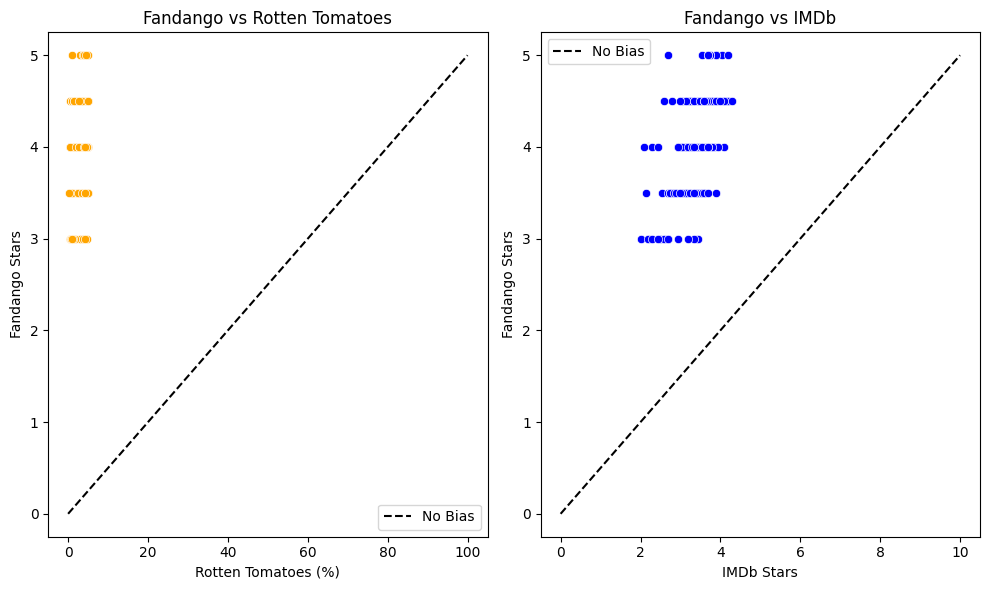

In [ ]:
#Compare Fandango ratings directly with other platforms using scatter plots.

plt.figure(figsize=(10, 6))

# Fandango vs Rotten Tomatoes
plt.subplot(1, 2, 1)
sns.scatterplot(data=previous, x='RT_norm', y='Fandango_Stars', color='orange')
plt.plot([0, 100], [0, 5], linestyle='--', color='black', label='No Bias')  # Reference line for no bias
plt.title("Fandango vs Rotten Tomatoes")
plt.xlabel("Rotten Tomatoes (%)")
plt.ylabel("Fandango Stars")
plt.legend()

# Fandango vs IMDb
plt.subplot(1, 2, 2)
sns.scatterplot(data=previous, x='IMDB_norm', y='Fandango_Stars', color='blue')
plt.plot([0, 10], [0, 5], linestyle='--', color='black', label='No Bias')  # Reference line for no bias
plt.title("Fandango vs IMDb")
plt.xlabel("IMDb Stars")
plt.ylabel("Fandango Stars")
plt.legend()

plt.tight_layout()
plt.show()


Both the plot shows that fandango ratings are higher than other platforms.
the plot with rotten tomatos it is concentrated horizontally in upper range, and the plot with imdb shows variation, but in both the fandangods stars are clustered in 3 to 5 stars.

In [ ]:
# Extracting the year from the 'FILM' column and create a new column
previous['Year'] = previous['FILM'].str.extract(r'\((\d{4})\)').astype(int)

# Create a new dataset with IMDb, Rotten Tomatoes, and Metacritic ratings
otherplatforms_ratings_dataset = previous[['FILM', 'Year', 'IMDB', 'IMDB_norm','RottenTomatoes', 'RT_norm', 'Metacritic','Metacritic_norm' ]]

otherplatforms_ratings_dataset.head()


,FILM,Year,IMDB,IMDB_norm,RottenTomatoes,RT_norm,Metacritic,Metacritic_norm
0,Avengers: Age of Ultron (2015),2015,7.8,3.90,74,3.70,66,3.30
1,Cinderella (2015),2015,7.1,3.55,85,4.25,67,3.35
2,Ant-Man (2015),2015,7.8,3.90,80,4.00,64,3.20
3,Do You Believe? (2015),2015,5.4,2.70,18,0.90,22,1.10
4,Hot Tub Time Machine 2 (2015),2015,5.1,2.55,14,0.70,29,1.45


In [ ]:
#changing the name of the column
otherplatforms_ratings_dataset.rename(columns={'RT_norm': 'RT_ratings'}, inplace=True)
otherplatforms_ratings_dataset.rename(columns={'IMDB_norm': 'IMDB_ratings'}, inplace=True)
otherplatforms_ratings_dataset.rename(columns={'Metacritic_norm': 'Metacritic_ratings'}, inplace=True)

<ipython-input-34-2063807249fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherplatforms_ratings_dataset.rename(columns={'RT_norm': 'RT_ratings'}, inplace=True)
<ipython-input-34-2063807249fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherplatforms_ratings_dataset.rename(columns={'IMDB_norm': 'IMDB_ratings'}, inplace=True)
<ipython-input-34-2063807249fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherplatforms_rat

In [ ]:
otherplatforms_ratings_dataset.head()#checking the changes

,FILM,Year,IMDB,IMDB_ratings,RottenTomatoes,RT_ratings,Metacritic,Metacritic_ratings
0,Avengers: Age of Ultron (2015),2015,7.8,3.90,74,3.70,66,3.30
1,Cinderella (2015),2015,7.1,3.55,85,4.25,67,3.35
2,Ant-Man (2015),2015,7.8,3.90,80,4.00,64,3.20
3,Do You Believe? (2015),2015,5.4,2.70,18,0.90,22,1.10
4,Hot Tub Time Machine 2 (2015),2015,5.1,2.55,14,0.70,29,1.45


Text(0.5, 1.0, 'Metacritic Ratings')

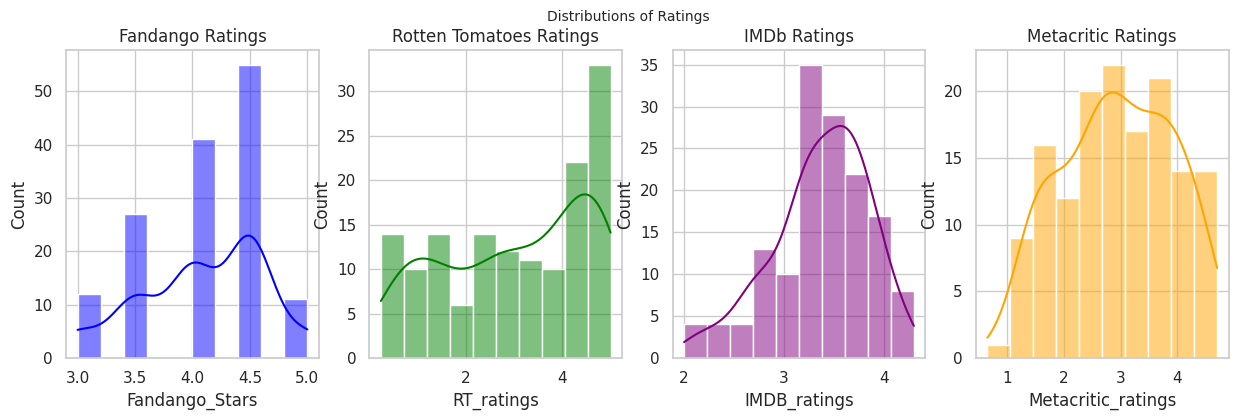

In [ ]:
sns.set(style="whitegrid")

# Plot histograms for all the ratings
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
fig.suptitle('Distributions of Ratings', fontsize=10)

sns.histplot(previous_fandango['Fandango_Stars'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Fandango Ratings')

sns.histplot(otherplatforms_ratings_dataset['RT_ratings'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Rotten Tomatoes Ratings')

sns.histplot(otherplatforms_ratings_dataset['IMDB_ratings'], bins=10, kde=True, ax=axes[2], color='purple')
axes[2].set_title('IMDb Ratings')

sns.histplot(otherplatforms_ratings_dataset['Metacritic_ratings'], bins=10, kde=True, ax=axes[3], color='orange')
axes[3].set_title('Metacritic Ratings')

We can clearly observe that:
1. Fandango ratings: The ratings cluster more around 4.0 to 4.5 with few below 3.0. The peak around 4.5 shows the ratings favour.
2. Rotten Tomatoes: The ratings shows a increase towards higher ratings. Spread over the ratings.
3. IMDB: Concentrated between 2.5 and 4.0, highest near 3.5. Shows the balance between the numbers.
4. Metacritic: Span a wide range from 1.0 to 4.0. Showing peak 2.5 to 3.0.The distribution is symmetrical.

Thus, in shows that fandango ratings are higher in comparing with other platforms.
Metacrictic seems to have the most diverse and critical ratings.
Imbd shows a neutral perspective.

In [ ]:
# Calculate differences between Fandango 2015 and other platforms
fandango_2015['rt_diff'] = fandango_2015['Fandango_Stars'] - otherplatforms_ratings_dataset['RT_ratings']
fandango_2015['imdb_diff'] = fandango_2015['Fandango_Stars'] - otherplatforms_ratings_dataset['IMDB_ratings']
fandango_2015['metacritic_diff'] = fandango_2015['Fandango_Stars'] - otherplatforms_ratings_dataset['Metacritic_ratings']

<ipython-input-37-d11416b41b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_2015['rt_diff'] = fandango_2015['Fandango_Stars'] - otherplatforms_ratings_dataset['RT_ratings']
<ipython-input-37-d11416b41b54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_2015['imdb_diff'] = fandango_2015['Fandango_Stars'] - otherplatforms_ratings_dataset['IMDB_ratings']
<ipython-input-37-d11416b41b54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
fandango_2015[['rt_diff', 'imdb_diff', 'metacritic_diff']].describe()

,rt_diff,imdb_diff,metacritic_diff
count,129.000000,129.000000,129.000000
mean,1.165504,0.743411,1.244961
std,1.426230,0.443767,0.969432
min,-1.800000,-0.450000,-1.150000
25%,-0.100000,0.500000,0.650000
50%,1.150000,0.750000,1.300000
75%,2.350000,0.950000,1.950000
max,4.100000,2.300000,3.900000


The mean difference for IMDb is relatively lower showing its more consistent, however, the greater difference with Metacritic shows that the ratings of both are totally differenct, and infliation in fandangos ratings.

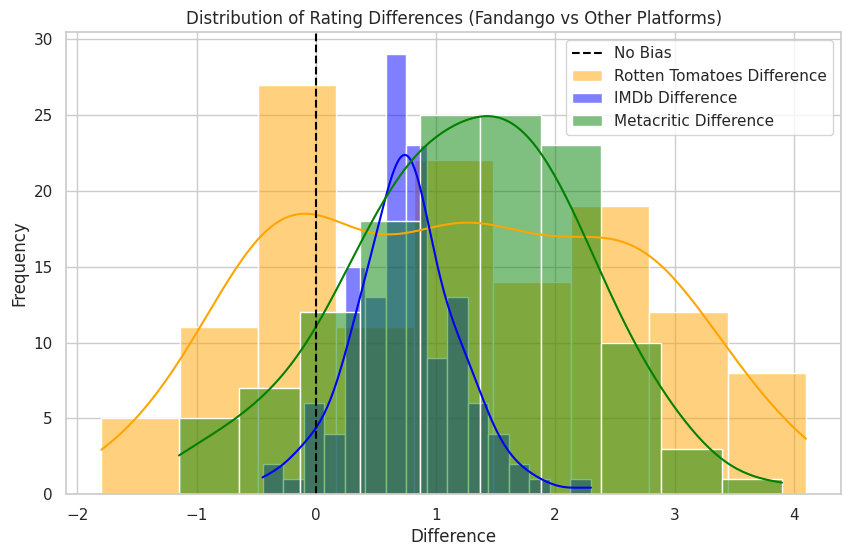

In [ ]:
# Visualize the differences
plt.figure(figsize=(10, 6))
sns.histplot(fandango_2015['rt_diff'], kde=True, color='orange', label='Rotten Tomatoes Difference')
sns.histplot(fandango_2015['imdb_diff'], kde=True, color='blue', label='IMDb Difference')
sns.histplot(fandango_2015[
'metacritic_diff'], kde=True, color='green', label='Metacritic Difference')



plt.axvline(0, color='black', linestyle='--', label='No Bias')
plt.title("Distribution of Rating Differences (Fandango vs Other Platforms)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Metacritic and rotten tomatoes have larger differences, IMDb shows smaller differences thus its ratings are balanced.
Rotten tomatoes and metacritic are skewed more positively, imdb is concentrated towards 0.75 showing less variability.
This shows that Metacrictic and rotten tomatoes are more fair ratings than fandango which constanly favours favourable ratings.

In [ ]:
# Calculate differences between Fandango 2016 and other platforms
fandango_2016['rt_diff'] = fandango_2016['fandango'] - otherplatforms_ratings_dataset['RT_ratings']
fandango_2016['imdb_diff'] = fandango_2016['fandango'] - otherplatforms_ratings_dataset['IMDB_ratings']
fandango_2016['metacritic_diff'] = fandango_2016['fandango'] - otherplatforms_ratings_dataset['Metacritic_ratings']

<ipython-input-40-cfdac4dcdcc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_2016['rt_diff'] = fandango_2016['fandango'] - otherplatforms_ratings_dataset['RT_ratings']
<ipython-input-40-cfdac4dcdcc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_2016['imdb_diff'] = fandango_2016['fandango'] - otherplatforms_ratings_dataset['IMDB_ratings']
<ipython-input-40-cfdac4dcdcc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
fandango_2016[['rt_diff', 'imdb_diff', 'metacritic_diff']].describe()

,rt_diff,imdb_diff,metacritic_diff
count,133.000000,133.000000,133.000000
mean,0.746992,0.501504,0.878571
std,1.485100,0.627554,0.996952
min,-2.150000,-1.300000,-1.350000
25%,-0.450000,0.150000,0.100000
50%,0.450000,0.500000,0.900000
75%,2.000000,0.850000,1.500000
max,4.050000,2.200000,3.200000


We can observe the change in the differences, however, still the difference with metacritic is high due to the biasness in the ratings.
Rotten tomatoes shows the largest variability.


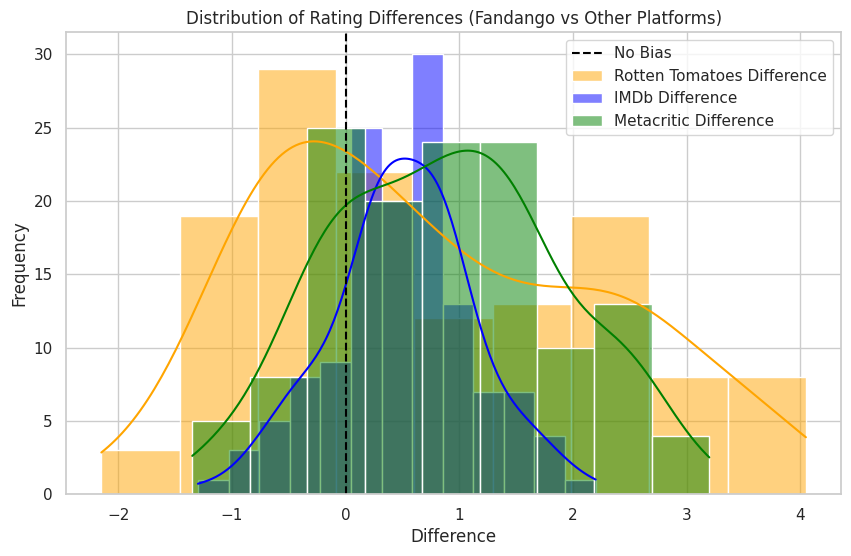

In [ ]:
# Visualize the differences
plt.figure(figsize=(10, 6))
sns.histplot(fandango_2016['rt_diff'], kde=True, color='orange', label='Rotten Tomatoes Difference')
sns.histplot(fandango_2016['imdb_diff'], kde=True, color='blue', label='IMDb Difference')
sns.histplot(fandango_2016['metacritic_diff'], kde=True, color='green', label='Metacritic Difference')



plt.axvline(0, color='black', linestyle='--', label='No Bias')
plt.title("Distribution of Rating Differences (Fandango vs Other Platforms)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The skewness of rotten tomatoes towards left shows that fandanogo ratings were rated higher.
The peak of blue shows that movies rated were only 0.5 points higher, green shows more variability.

we can see the distribution is spread out for rotten tomatoes and metacritic however imbd is clustered in the middle.

**Key changes compared to 2015**

We can observe small inflation and more spread of the plot, indicating the required changes done by fandango. However, it still rates more than rotten tomatoes and metacritic.
The min and max difference is low, showing the alignment of platform with other.


In [ ]:
previous['rt_diff'] = previous['Fandango_Stars'] - previous['IMDB_norm']


# Top 5 most positively biased movies (Fandango vs imbd)
top_positive_bias = previous.nlargest(5, 'rt_diff')[['FILM', 'Fandango_Stars', 'IMDB_norm', 'rt_diff']]

# Top 5 most negatively biased movies (Fandango vs imbd)
top_negative_bias = previous.nsmallest(5, 'rt_diff')[['FILM', 'Fandango_Stars', 'IMDB_norm', 'rt_diff']]

print("Top Positive Bias:\n", top_positive_bias)
print("\nTop Negative Bias:\n", top_negative_bias)

Top Positive Bias:
                            FILM  Fandango_Stars  IMDB_norm  rt_diff
3        Do You Believe? (2015)             5.0        2.7      2.3
47                 Annie (2014)             4.5        2.6      1.9
97  Fifty Shades of Grey (2015)             4.0        2.1      1.9
19                Pixels (2015)             4.5        2.8      1.7
33     The Boy Next Door (2015)             4.0        2.3      1.7

Top Negative Bias:
                                           FILM  Fandango_Stars  IMDB_norm  \
112                          It Follows (2015)             3.0       3.45   
144  Gett: The Trial of Viviane Amsalem (2015)             3.5       3.90   
113                       Inherent Vice (2014)             3.0       3.35   
115                   While We're Young (2015)             3.0       3.20   
143                 Two Days, One Night (2014)             3.5       3.70   

     rt_diff  
112    -0.45  
144    -0.40  
113    -0.35  
115    -0.20  
143    -0.20 

In [ ]:
previous['imbd_diff'] = previous['Fandango_Stars'] - previous['RT_norm']

# Top 5 most positively biased movies (Fandango vs Rotten Tomatoes)
top_positive_bias = previous.nlargest(5, 'rt_diff')[['FILM', 'Fandango_Stars', 'RT_norm', 'rt_diff']]

# Top 5 most negatively biased movies (Fandango vs Rotten Tomatoes)
top_negative_bias = previous.nsmallest(5, 'rt_diff')[['FILM', 'Fandango_Stars', 'RT_norm', 'rt_diff']]

print("Top Positive Bias:\n", top_positive_bias)
print("\nTop Negative Bias:\n", top_negative_bias)

Top Positive Bias:
                            FILM  Fandango_Stars  RT_norm  rt_diff
3        Do You Believe? (2015)             5.0     0.90      2.3
47                 Annie (2014)             4.5     1.35      1.9
97  Fifty Shades of Grey (2015)             4.0     1.25      1.9
19                Pixels (2015)             4.5     0.85      1.7
33     The Boy Next Door (2015)             4.0     0.50      1.7

Top Negative Bias:
                                           FILM  Fandango_Stars  RT_norm  \
112                          It Follows (2015)             3.0     4.80   
144  Gett: The Trial of Viviane Amsalem (2015)             3.5     5.00   
113                       Inherent Vice (2014)             3.0     3.65   
115                   While We're Young (2015)             3.0     4.15   
143                 Two Days, One Night (2014)             3.5     4.85   

     rt_diff  
112    -0.45  
144    -0.40  
113    -0.35  
115    -0.20  
143    -0.20  


The above calculation shows us the top negative and positive biased movies based on differences and ratings.

<ipython-input-46-6f4040e1e0c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_2015['rating_group'] = pd.cut(fandango_2015['Fandango_Stars'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])
<ipython-input-46-6f4040e1e0c4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fandango_2015, x='rating_group', y='rt_diff', palette='coolwarm')


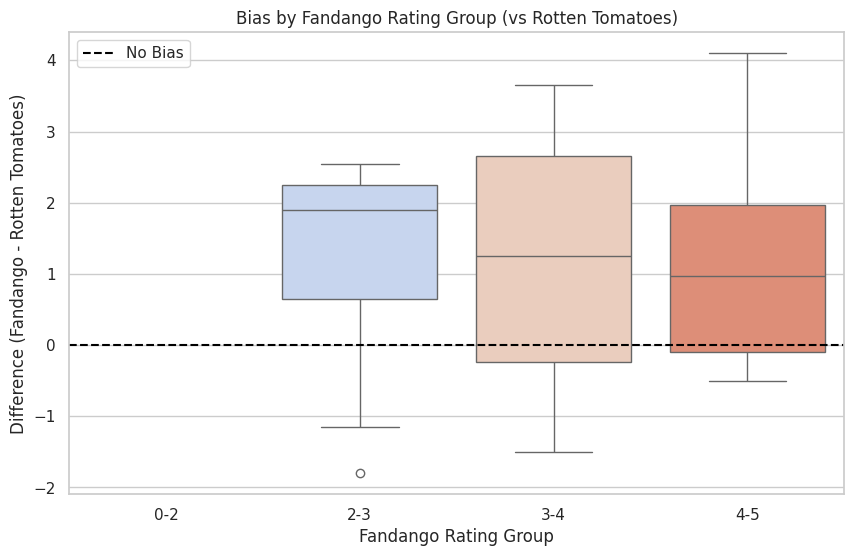

In [ ]:
#Boxplot: Bias by Rating Group


fandango_2015['rating_group'] = pd.cut(fandango_2015['Fandango_Stars'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=fandango_2015, x='rating_group', y='rt_diff', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--', label='No Bias')
plt.title("Bias by Fandango Rating Group (vs Rotten Tomatoes)")
plt.xlabel("Fandango Rating Group")
plt.ylabel("Difference (Fandango - Rotten Tomatoes)")
plt.legend()
plt.show()


This boxplot shows us the difference in ratings of fandango and rotten tomatoes. We can see the inclination towards higher ratings.

<ipython-input-49-6fb27165d3bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_2016['rating_group'] = pd.cut(fandango_2016['fandango'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])
<ipython-input-49-6fb27165d3bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fandango_2015, x='rating_group', y='rt_diff', palette='coolwarm')


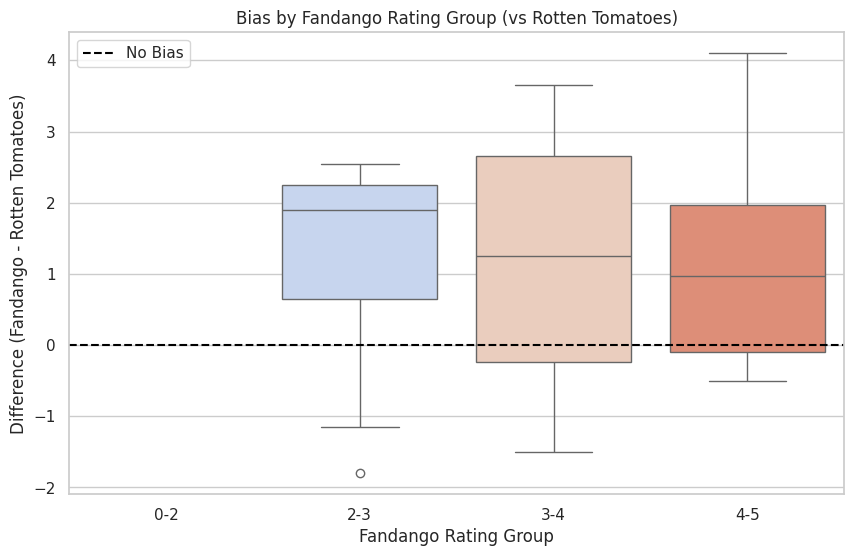

In [ ]:

fandango_2016['rating_group'] = pd.cut(fandango_2016['fandango'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=fandango_2015, x='rating_group', y='rt_diff', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--', label='No Bias')
plt.title("Bias by Fandango Rating Group (vs Rotten Tomatoes)")
plt.xlabel("Fandango Rating Group")
plt.ylabel("Difference (Fandango - Rotten Tomatoes)")
plt.legend()
plt.show()

We can observe less difference in the ratings.

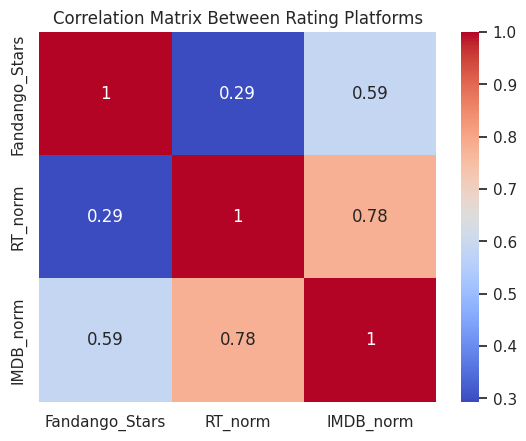

In [ ]:
#correlation matterix of the ratings
correlation_matrix = previous[['Fandango_Stars', 'RT_norm', 'IMDB_norm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Between Rating Platforms")
plt.show()


This shows us the weak correlation with rotten tomatoes and imdb, indicatiing biasness.
However, we can observe strong correlation between rotten tomatoes and imdb, showing consistent and unbiased ratings.

**Conclusion**

This analysis highlights significant discrepancies in movie ratings across platforms, with a particular focus on Fandango's rating patterns. The findings confirm that Fandango ratings are systematically skewed toward higher values compared to Rotten Tomatoes and IMDb. This inflation is evident in Fandango's consistently higher median, narrower variability, and weaker correlation with other platforms.

The implications of this bias are critical for consumers. Fandango's inflated ratings may mislead audiences into overestimating the quality of movies, impacting their viewing choices. In contrast, platforms like Rotten Tomatoes and IMDb provide more balanced and nuanced evaluations, with broader distributions and a closer alignment between audience and critic reviews.

Key Takeaways:
Fandango's Bias:

Ratings are disproportionately high, with limited variability.
This suggests a possible incentive to favorably represent movies.
Diverse Evaluations:

Rotten Tomatoes and IMDb showcase broader perspectives, reflecting varied audience and critic opinions.
Consumer Guidance:

Users should be cautious about relying solely on Fandango ratings and consider consulting multiple platforms for a well-rounded view.
This analysis underscores the importance of transparency and accountability in rating systems, emphasizing the need for consumers to critically evaluate their sources of information. By understanding these biases, audiences can make more informed decisions and cultivate a more accurate perception of movie quality.